In [1]:
import os
import re
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform


In [3]:
skimage.__version__

'0.18.1'

In [4]:
# load the data
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [5]:
data['description']

'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'

In [6]:
# split the data into independent and dependent
X = data['data'] # independent
y = data['target'] # dependent

In [7]:
# print(X)

In [8]:
print(y)

['bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

In [9]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
x_train.shape, x_test.shape, len(y_train), len(y_test)

((1645, 80, 80, 3), (412, 80, 80, 3), 1645, 412)

---
####  Feature Extraction
- Hog
[URL](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/#:~:text=HOG%2C%20or%20Histogram%20of%20Oriented,vision%20tasks%20for%20object%20detection.)

(907, 645, 3)

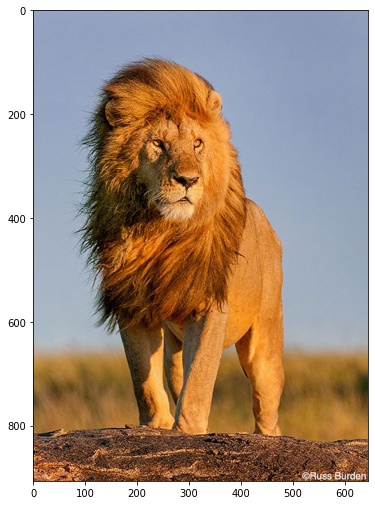

In [52]:
img = skimage.io.imread('images/img.png')
img = skimage.io.imread('images/lion.png')
plt.figure(figsize=(6,10))
plt.imshow(img)
img.shape

In [43]:
# skimage.feature.hog?

In [67]:
# hog transoform

img_re = img
img_re = skimage.transform.rescale(img,1/3)
# img_re = skimage.transform.resize(img,(302,215,3))

# gray = skimage.color.rgb2gray(img_re)
gray = img_re

feature_vector, hog_img = skimage.feature.hog(  gray,
                                                orientations=9,
                                                pixels_per_cell=(14,14),
                                                cells_per_block=(2,2),
                                                visualize=True)

In [68]:
img_re.shape

(302, 215, 1)

In [69]:
len(feature_vector)

10080

In [70]:
feature_vector.shape

(10080,)

In [71]:
gray.shape

(302, 215, 1)

In [72]:
302*215

64930

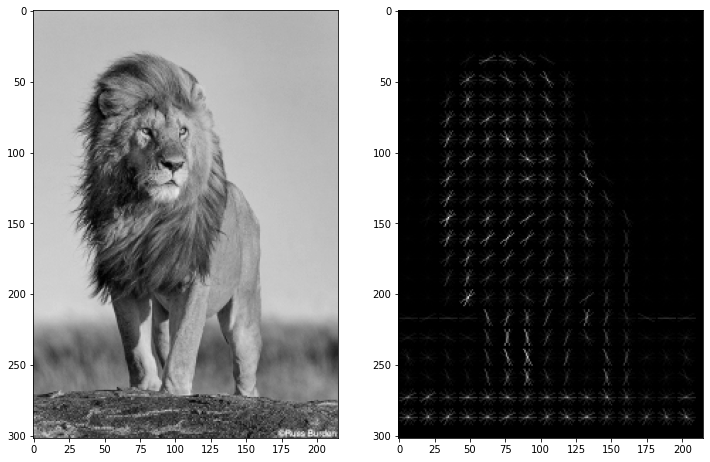

In [73]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

---

## Preprocessing
- Grayscale
- Hog (histogram oriented gradient) tranformer

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

In [39]:
from skimage.color import rgb2gray

In [40]:
class rgb2gray_transform(BaseEstimator, TransformerMixin):

    import skimage.color

    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [41]:
x_train.shape

(1645, 80, 80, 3)

In [42]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [43]:
x_train_gray.shape

(1645, 80, 80)

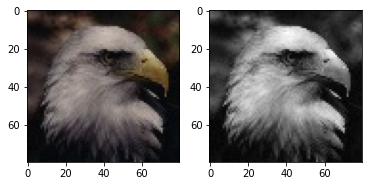

In [46]:
plt.subplot(1,2,1)
plt.imshow(x_train[555])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[555],cmap='gray')

In [98]:
class hog_transformer(BaseEstimator, TransformerMixin):

    import skimage.feature

    def __init__(self, orientations=9, pixels_per_cell=(8,8), cells_per_block=(3,3), visualize=True, ):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.visualize = visualize
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features,hog_img = skimage.feature.hog( img,
                                                orientations=self.orientations,
                                                pixels_per_cell=self.pixels_per_cell,
                                                cells_per_block=self.cells_per_block,
                                                visualize=self.visualize
                                                )
            
            return hog_features, hog_img
        
        hfeatures = np.array([local_hog(x)[0] for x in X])
        himgs = np.array([local_hog(x)[1] for x in X])

        return hfeatures, himgs

In [166]:
class hog_transformer_2(BaseEstimator, TransformerMixin):

    import skimage.feature

    def __init__(self, orientations=9, pixels_per_cell=(8,8), cells_per_block=(3,3), visualize=False, ):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.visualize = visualize
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features = skimage.feature.hog( img,
                                                orientations=self.orientations,
                                                pixels_per_cell=self.pixels_per_cell,
                                                cells_per_block=self.cells_per_block,
                                                visualize=self.visualize
                                                )
            
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])

        return hfeatures

In [92]:
hogt = hog_transformer()

In [93]:
x_train_hog, x_train_hog_imgs = hogt.fit_transform(x_train_gray)

In [94]:
x_train_hog.shape

(1645, 5184)

In [95]:
x_train_hog_imgs.shape

(1645, 80, 80)

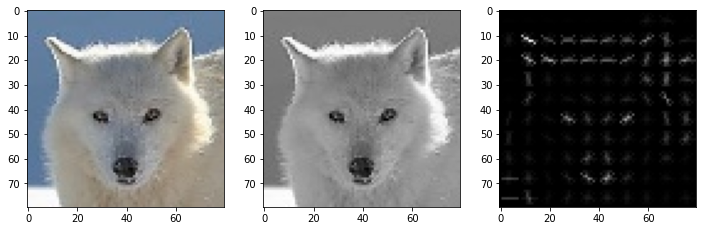

In [104]:
i = 206
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(x_train[i])
plt.subplot(1,3,2)
plt.imshow(x_train_gray[i],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(x_train_hog_imgs[i],cmap='gray')
plt.show()

### Training Machine Learning Model

In [123]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [106]:
model_sgd = SGDClassifier(  loss='hinge',
                            learning_rate='adaptive',
                            early_stopping=True,
                            eta0=0.1,
                            n_jobs=-1,
                            verbose=1,
                            )

In [152]:
MLPClassifierModel = MLPClassifier(activation='relu',
                                   solver='adam',
                                   learning_rate='adaptive',
                                   learning_rate_init=0.0001,
                                   hidden_layer_sizes=(300, 200, 100),
                                   max_iter=1000,
                                   batch_size=20,
                                   verbose=True,
                                   early_stopping=True,
                                   )

In [107]:
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [108]:
grayify = rgb2gray_transform()
hogify = hog_transformer()
scalify = StandardScaler()

In [109]:
# pipeline
# step-1: convert into grayscale
x_train_gray = grayify.fit_transform(x_train)
# step-2: extract the features
x_train_hog, x_train_hog_imgs = hogify.fit_transform(x_train_gray)
# step-3: Normalization
x_train_scale = scalify.fit_transform(x_train_hog)
# step-4: machine learning
model_sgd.fit(x_train_scale, y_train)

Zs: 5184, Bias: -209.320000, T: 14800, Avg. loss: 0.000000
Total training time: 0.67 seconds.
Norm: 69.02, NNZs: 5184, Bias: -214.680000, T: 65120, Avg. loss: 0.000000
Total training time: 3.68 seconds.
Norm: 87.45, NNZs: 5184, Bias: -202.520000, T: 10360, Avg. loss: 2.206674-- Epoch 10

Total training time: 0.47 seconds.
Norm: 95.63, NNZs: 5184, Bias: -213.500000, T: 68080, Avg. loss: 0.000000
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 92.88, NNZs: 5184, Bias: -205.320000, T: 14800, Avg. loss: 0.008840
Total training time: 0.65 seconds.
-- Epoch 45
-- Epoch 8
-- Epoch 11
-- Epoch 47
Norm: 90.13, NNZs: 5184, Bias: -205.900000, T: 8880, Avg. loss: 5.195128
Total training time: 0.40 seconds.
Norm: 69.02, NNZs: 5184, Bias: -214.680000, T: 66600, Avg. loss: 0.000000
Total training time: 3.73 seconds.
-- Epoch 11Norm: 86.81, NNZs: 5184, Bias: -202.720000, T: 11840, Avg. loss: 0.127049
Total training time: 0.53 seconds.

Norm: 95.63, NNZs: 5184, Bias: -213.500000, T: 69560, Avg. los

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive',
              n_jobs=-1, verbose=1)

In [153]:
MLPClassifierModel.fit(x_train_scale, y_train)

Iteration 1, loss = 2.46717930
Validation score: 0.503030
Iteration 2, loss = 1.00043887
Validation score: 0.703030
Iteration 3, loss = 0.39691106
Validation score: 0.733333
Iteration 4, loss = 0.16560688
Validation score: 0.745455
Iteration 5, loss = 0.07932100
Validation score: 0.763636
Iteration 6, loss = 0.04654843
Validation score: 0.763636
Iteration 7, loss = 0.03138186
Validation score: 0.775758
Iteration 8, loss = 0.02316965
Validation score: 0.775758
Iteration 9, loss = 0.01808063
Validation score: 0.781818
Iteration 10, loss = 0.01474091
Validation score: 0.787879
Iteration 11, loss = 0.01236963
Validation score: 0.787879
Iteration 12, loss = 0.01064433
Validation score: 0.787879
Iteration 13, loss = 0.00932811
Validation score: 0.787879
Iteration 14, loss = 0.00831372
Validation score: 0.787879
Iteration 15, loss = 0.00749503
Validation score: 0.793939
Iteration 16, loss = 0.00684345
Validation score: 0.793939
Iteration 17, loss = 0.00631082
Validation score: 0.793939
Iterat

MLPClassifier(batch_size=20, early_stopping=True,
              hidden_layer_sizes=(300, 200, 100), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=1000, verbose=True)

In [154]:
# ---------------------
print("Class labels for each output : ", MLPClassifierModel.classes_)
print("Number of outputs : ", MLPClassifierModel.n_outputs_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print("The number of training samples seen by the solver during fitting : ", MLPClassifierModel.t_)
print("="*10)
# ---------------------
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
# print("MLPClassifierModel best loss is : ", MLPClassifierModel.best_loss_) # early_stopping = False (must be)
print("MLPClassifierModel loss curve is : ", MLPClassifierModel.loss_curve_[-5:]) 
print("MLPClassifierModel loss curve length is : ", len(MLPClassifierModel.loss_curve_)) 

Class labels for each output :  ['bear' 'cat' 'chicken' 'cow' 'deer' 'dog' 'duck' 'eagle' 'elephant'
 'human' 'lion' 'monkey' 'mouse' 'natural' 'panda' 'pigeon' 'rabbit'
 'sheep' 'tiger' 'wolf']
Number of outputs :  20
MLPClassifierModel last activation is :  softmax
MLPClassifierModel No. of layers is :  5
MLPClassifierModel No. of iterations is :  26
The number of training samples seen by the solver during fitting :  38480
MLPClassifierModel loss is :  0.003997251454411385
MLPClassifierModel loss curve is :  [0.0046721781731923415, 0.00446930812806206, 0.004291636703437105, 0.00413538792819405, 0.003997251454411385]
MLPClassifierModel loss curve length is :  26


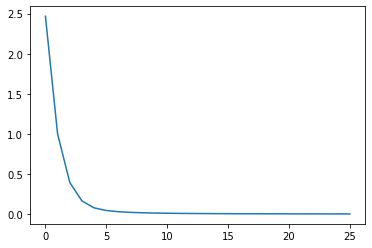

In [356]:
plt.figure()
sns.lineplot(data=MLPClassifierModel.loss_curve_)
plt.show()

In [112]:
x_test_gray = grayify.fit_transform(x_test)
# step-2: extract the features
x_test_hog, x_test_hog_imgs = hogify.fit_transform(x_test_gray)
# step-3: Normalization
x_test_scale = scalify.transform(x_test_hog)

y_pred_test = model_sgd.predict(x_test_scale)

In [113]:
y_pred_test

array(['pigeon', 'panda', 'deer', 'cat', 'lion', 'lion', 'bear', 'deer',
       'dog', 'eagle', 'mouse', 'pigeon', 'cat', 'cat', 'cat', 'wolf',
       'tiger', 'cat', 'cat', 'elephant', 'wolf', 'panda', 'panda',
       'tiger', 'human', 'panda', 'panda', 'sheep', 'pigeon', 'deer',
       'pigeon', 'tiger', 'tiger', 'human', 'wolf', 'cat', 'monkey',
       'elephant', 'human', 'pigeon', 'pigeon', 'duck', 'panda', 'monkey',
       'tiger', 'chicken', 'deer', 'panda', 'tiger', 'lion', 'eagle',
       'cat', 'tiger', 'panda', 'panda', 'cat', 'wolf', 'dog', 'deer',
       'panda', 'sheep', 'monkey', 'human', 'cat', 'rabbit', 'deer',
       'tiger', 'chicken', 'human', 'dog', 'eagle', 'lion', 'rabbit',
       'natural', 'elephant', 'cat', 'elephant', 'cat', 'duck', 'pigeon',
       'tiger', 'panda', 'monkey', 'chicken', 'duck', 'cat', 'elephant',
       'wolf', 'lion', 'tiger', 'cat', 'chicken', 'elephant', 'panda',
       'human', 'dog', 'tiger', 'elephant', 'tiger', 'duck', 'elephant',
   

In [357]:
y_pred_test = MLPClassifierModel.predict(x_test_scale)

### Model Evaluation

In [122]:
cr = sklearn.metrics.classification_report(y_test, y_pred_test, output_dict=False)
# pd.DataFrame(cr).T
print(cr)

              precision    recall  f1-score   support

        bear       0.56      0.25      0.34        20
         cat       0.55      0.75      0.63        32
     chicken       0.65      0.65      0.65        20
         cow       0.40      0.38      0.39        21
        deer       0.70      0.67      0.68        21
         dog       0.67      0.46      0.55        26
        duck       0.60      0.71      0.65        21
       eagle       0.50      0.40      0.44        20
    elephant       0.48      0.70      0.57        20
       human       0.70      0.95      0.81        20
        lion       0.35      0.35      0.35        20
      monkey       0.53      0.50      0.51        20
       mouse       0.39      0.35      0.37        20
     natural       0.00      0.00      0.00         1
       panda       0.64      0.88      0.74        24
      pigeon       0.70      0.61      0.65        23
      rabbit       0.56      0.45      0.50        20
       sheep       0.47    

In [117]:
metrics.cohen_kappa_score(y_test, y_pred_test)

0.5485437497665268

In [358]:
cr = sklearn.metrics.classification_report(y_test, y_pred_test, output_dict=False)
# pd.DataFrame(cr).T
print(cr)

              precision    recall  f1-score   support

        bear       0.62      0.65      0.63        20
         cat       0.76      0.88      0.81        32
     chicken       0.81      0.85      0.83        20
         cow       0.76      0.62      0.68        21
        deer       0.72      0.86      0.78        21
         dog       0.83      0.58      0.68        26
        duck       0.89      0.81      0.85        21
       eagle       0.64      0.90      0.75        20
    elephant       0.94      0.75      0.83        20
       human       1.00      0.95      0.97        20
        lion       0.75      0.90      0.82        20
      monkey       0.93      0.70      0.80        20
       mouse       0.65      0.85      0.74        20
     natural       0.00      0.00      0.00         1
       panda       0.92      1.00      0.96        24
      pigeon       0.83      0.83      0.83        23
      rabbit       0.79      0.55      0.65        20
       sheep       0.67    

In [359]:
metrics.cohen_kappa_score(y_test, y_pred_test)

0.7820010831471026

# Pipeline Model

In [167]:
from sklearn.pipeline import Pipeline

In [168]:
model_pipeline = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hog_transformer_2(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
])

In [343]:
model_pipeline.fit(x_train,y_train)

Iteration 1, loss = 2.64217429
Validation score: 0.442424
Iteration 2, loss = 1.46527338
Validation score: 0.587879
Iteration 3, loss = 0.77056381
Validation score: 0.727273
Iteration 4, loss = 0.40725420
Validation score: 0.751515
Iteration 5, loss = 0.22388221
Validation score: 0.781818
Iteration 6, loss = 0.12987084
Validation score: 0.775758
Iteration 7, loss = 0.08179789
Validation score: 0.781818
Iteration 8, loss = 0.05530740
Validation score: 0.793939
Iteration 9, loss = 0.04024339
Validation score: 0.806061
Iteration 10, loss = 0.03099163
Validation score: 0.806061
Iteration 11, loss = 0.02478065
Validation score: 0.800000
Iteration 12, loss = 0.02042224
Validation score: 0.812121
Iteration 13, loss = 0.01720091
Validation score: 0.800000
Iteration 14, loss = 0.01480371
Validation score: 0.812121
Iteration 15, loss = 0.01295757
Validation score: 0.806061
Iteration 16, loss = 0.01148584
Validation score: 0.793939
Iteration 17, loss = 0.01030472
Validation score: 0.800000
Iterat

Pipeline(steps=[('grascale', rgb2gray_transform()),
                ('hogtransform',
                 hog_transformer_2(orientations=8, pixels_per_cell=(10, 10))),
                ('scale', StandardScaler()),
                ('mlp',
                 MLPClassifier(batch_size=20, early_stopping=True,
                               hidden_layer_sizes=(300, 200, 100),
                               learning_rate='adaptive',
                               learning_rate_init=0.0001, max_iter=1000,
                               verbose=True))])

In [170]:
y_pred = model_pipeline.predict(x_test)

In [171]:
y_pred

array(['pigeon', 'panda', 'deer', 'cat', 'cow', 'chicken', 'bear', 'deer',
       'monkey', 'pigeon', 'wolf', 'pigeon', 'cat', 'wolf', 'wolf',
       'wolf', 'elephant', 'elephant', 'cow', 'cat', 'cat', 'duck',
       'bear', 'tiger', 'mouse', 'panda', 'deer', 'sheep', 'eagle',
       'deer', 'pigeon', 'lion', 'tiger', 'human', 'wolf', 'cat', 'cat',
       'elephant', 'human', 'cow', 'cat', 'duck', 'panda', 'monkey',
       'tiger', 'eagle', 'deer', 'panda', 'tiger', 'panda', 'tiger',
       'cat', 'tiger', 'dog', 'panda', 'cat', 'wolf', 'dog', 'eagle',
       'wolf', 'sheep', 'lion', 'human', 'cat', 'rabbit', 'deer', 'deer',
       'dog', 'human', 'dog', 'eagle', 'lion', 'rabbit', 'lion',
       'elephant', 'cat', 'elephant', 'mouse', 'duck', 'mouse', 'tiger',
       'panda', 'bear', 'chicken', 'duck', 'cat', 'elephant', 'mouse',
       'lion', 'tiger', 'sheep', 'chicken', 'mouse', 'cat', 'human',
       'dog', 'tiger', 'dog', 'tiger', 'duck', 'elephant', 'panda',
       'monkey', 'ea

In [389]:
y_test_val = le.transform(y_test)

In [173]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.526316,0.500000,0.512821,20.000000
cat,0.555556,0.625000,0.588235,32.000000
chicken,0.571429,0.600000,0.585366,20.000000
cow,0.526316,0.476190,0.500000,21.000000
deer,0.695652,0.761905,0.727273,21.000000
dog,0.565217,0.500000,0.530612,26.000000
duck,0.772727,0.809524,0.790698,21.000000
eagle,0.619048,0.650000,0.634146,20.000000
elephant,0.555556,0.750000,0.638298,20.000000
human,0.818182,0.900000,0.857143,20.000000


In [175]:
cr = sklearn.metrics.classification_report(y_test, y_pred, output_dict=False)
print(cr)

              precision    recall  f1-score   support

        bear       0.53      0.50      0.51        20
         cat       0.56      0.62      0.59        32
     chicken       0.57      0.60      0.59        20
         cow       0.53      0.48      0.50        21
        deer       0.70      0.76      0.73        21
         dog       0.57      0.50      0.53        26
        duck       0.77      0.81      0.79        21
       eagle       0.62      0.65      0.63        20
    elephant       0.56      0.75      0.64        20
       human       0.82      0.90      0.86        20
        lion       0.64      0.70      0.67        20
      monkey       0.72      0.65      0.68        20
       mouse       0.50      0.55      0.52        20
     natural       0.00      0.00      0.00         1
       panda       0.83      0.79      0.81        24
      pigeon       0.74      0.61      0.67        23
      rabbit       0.55      0.30      0.39        20
       sheep       0.74    

## Grid Search
- Hyperparameter tuning

In [177]:
from sklearn.model_selection import GridSearchCV

In [243]:
estimator = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hog_transformer_2()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [252]:
param_grid = [
    {
        'hogtransform__orientations' : [7,8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','modified_huber','perceptron'],
        'sgd__learning_rate' : ['optimal'],
    },
    {
        'hogtransform__orientations' : [7,8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','modified_huber','perceptron'],
        'sgd__learning_rate' : ['adaptive'],
        'sgd__eta0' : [0.001,0.01],
    }
]

In [268]:
model_grid = GridSearchCV(estimator,
                          param_grid=param_grid,
                          n_jobs=-1,
                          cv=3,
                          verbose=0,
                          return_train_score=True,
                          scoring='accuracy',
                          )

In [269]:
model_grid.fit(x_train,y_train)

C:\Program Files\Python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grascale', rgb2gray_transform()),
                                       ('hogtransform', hog_transformer_2()),
                                       ('scale', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=-1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__learning_rate':...
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'modified_huber', 'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10],
                          'hogtransfo

In [270]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 7,
 'hogtransform__pixels_per_cell': (7, 7),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [271]:
model_grid.best_score_

nan

In [272]:
model_grid.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('grascale', rgb2gray_transform()),
  ('hogtransform', hog_transformer_2()),
  ('scale', StandardScaler()),
  ('sgd', SGDClassifier())],
 'estimator__verbose': False,
 'estimator__grascale': rgb2gray_transform(),
 'estimator__hogtransform': hog_transformer_2(),
 'estimator__scale': StandardScaler(),
 'estimator__sgd': SGDClassifier(),
 'estimator__hogtransform__cells_per_block': (3, 3),
 'estimator__hogtransform__orientations': 9,
 'estimator__hogtransform__pixels_per_cell': (8, 8),
 'estimator__hogtransform__visualize': False,
 'estimator__scale__copy': True,
 'estimator__scale__with_mean': True,
 'estimator__scale__with_std': True,
 'estimator__sgd__alpha': 0.0001,
 'estimator__sgd__average': False,
 'estimator__sgd__class_weight': None,
 'estimator__sgd__early_stopping': False,
 'estimator__sgd__epsilon': 0.1,
 'estimator__sgd__eta0': 0.0,
 'estimator__sgd__fit_intercept': True,
 'estimator__sgd__l1_rat

In [258]:
print(model_grid.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_hogtransform__cells_per_block', 'param_hogtransform__orientations', 'param_hogtransform__pixels_per_cell', 'param_sgd__learning_rate', 'param_sgd__loss', 'param_sgd__eta0', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'mean_train_score', 'std_train_score'])


In [259]:
GridSearchResults = pd.DataFrame(model_grid.cv_results_)

In [260]:
GridSearchResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hogtransform__cells_per_block,param_hogtransform__orientations,param_hogtransform__pixels_per_cell,param_sgd__learning_rate,param_sgd__loss,param_sgd__eta0,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.032412,0.000498,0.0,0.0,"(2, 2)",7,"(7, 7)",optimal,hinge,NaN,"{'hogtransform__cells_per_block': (2, 2), 'hog...",NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,0.034407,0.000501,0.0,0.0,"(2, 2)",7,"(7, 7)",optimal,squared_hinge,NaN,"{'hogtransform__cells_per_block': (2, 2), 'hog...",NaN,NaN,NaN,NaN,195,NaN,NaN,NaN,NaN
2,0.040892,0.008977,0.0,0.0,"(2, 2)",7,"(7, 7)",optimal,modified_huber,NaN,"{'hogtransform__cells_per_block': (2, 2), 'hog...",NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,NaN
3,0.036404,0.001497,0.0,0.0,"(2, 2)",7,"(7, 7)",optimal,perceptron,NaN,"{'hogtransform__cells_per_block': (2, 2), 'hog...",NaN,NaN,NaN,NaN,193,NaN,NaN,NaN,NaN
4,0.051363,0.018451,0.0,0.0,"(2, 2)",7,"(8, 8)",optimal,hinge,NaN,"{'hogtransform__cells_per_block': (2, 2), 'hog...",NaN,NaN,NaN,NaN,192,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.054024,0.027939,0.0,0.0,"(3, 3)",10,"(9, 9)",adaptive,perceptron,0.001,"{'hogtransform__cells_per_block': (3, 3), 'hog...",NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN
284,0.055437,0.022524,0.0,0.0,"(3, 3)",10,"(9, 9)",adaptive,hinge,0.01,"{'hogtransform__cells_per_block': (3, 3), 'hog...",NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN
285,0.054491,0.028562,0.0,0.0,"(3, 3)",10,"(9, 9)",adaptive,squared_hinge,0.01,"{'hogtransform__cells_per_block': (3, 3), 'hog...",NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,NaN
286,0.046501,0.023496,0.0,0.0,"(3, 3)",10,"(9, 9)",adaptive,modified_huber,0.01,"{'hogtransform__cells_per_block': (3, 3), 'hog...",NaN,NaN,NaN,NaN,287,NaN,NaN,NaN,NaN


___

In [234]:
model_best = model_grid.best_estimator_

In [261]:
y_pred = model_best.predict(x_test)

In [262]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.750000,0.750000,0.750000,20.00
cat,0.675676,0.781250,0.724638,32.00
chicken,0.653846,0.850000,0.739130,20.00
cow,0.650000,0.619048,0.634146,21.00
deer,0.842105,0.761905,0.800000,21.00
dog,0.500000,0.500000,0.500000,26.00
duck,0.850000,0.809524,0.829268,21.00
eagle,0.777778,0.700000,0.736842,20.00
elephant,0.857143,0.900000,0.878049,20.00
human,1.000000,1.000000,1.000000,20.00


In [263]:
# save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

In [240]:
pickle.dump(MLPClassifierModel,open('MLPClassifierModel_model_best.pickle','wb'))

## Make Pipeline

    {'hogtransform__cells_per_block': (2, 2),
     'hogtransform__orientations': 10,
     'hogtransform__pixels_per_cell': (8, 8),
     'sgd__learning_rate': 'optimal',
     'sgd__loss': 'hinge'}

In [ ]:
# model_pipeline = Pipeline([
#     ('grascale',rgb2gray_transform()),
#     ('hogtransform',hog_transformer_2(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
#     ('scale',StandardScaler()),
#     ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
# ])
# model_pipeline.fit(x_train,y_train)

In [273]:
from sklearn.pipeline import make_pipeline

In [275]:
pipeline1 = make_pipeline(  rgb2gray_transform(),
                            hog_transformer_2(  orientations=10,
                                                pixels_per_cell=(8,8),
                                                cells_per_block=(2,2)
                                             ),
                        )

In [276]:
feature_vector = pipeline1.fit_transform(x_train)

In [277]:
# standard scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [278]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [279]:
model.fit(transformed_xtrain, y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

In [280]:
# evaluate
feature_vector = pipeline1.fit_transform(x_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [281]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.700000,0.700000,0.700000,20.000000
cat,0.756757,0.875000,0.811594,32.000000
chicken,0.826087,0.950000,0.883721,20.000000
cow,0.777778,0.666667,0.717949,21.000000
deer,0.826087,0.904762,0.863636,21.000000
dog,0.720000,0.692308,0.705882,26.000000
duck,0.772727,0.809524,0.790698,21.000000
eagle,0.592593,0.800000,0.680851,20.000000
elephant,0.772727,0.850000,0.809524,20.000000
human,1.000000,0.950000,0.974359,20.000000


In [282]:
# save models for flask app
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [283]:
pickle.dump(scaler,open('dsa_scaler.pickle','wb'))

In [353]:
x_train_scale = scalify.fit_transform(x_train_hog)

In [355]:
pickle.dump(scalify,open('dsa_scaler.pickle','wb'))

# Output Analysis

In [350]:
# model_p = pickle.load(open('dsa_model_best.pickle','rb'))
model_p = pickle.load(open('MLPClassifierModel_model_best.pickle','rb'))
model_p = pickle.load(open('model_pipeline.pickle','rb'))

In [337]:
model_pipeline = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hog_transformer_2(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('mlp',model_p)
])

In [349]:
pickle.dump(scalar,open('model_pipeline.pickle','wb'))

In [338]:
model_p

MLPClassifier(batch_size=20, early_stopping=True,
              hidden_layer_sizes=(300, 200, 100), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=1000, verbose=True)

In [351]:
model_p.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

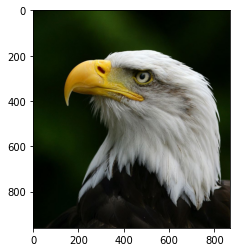

In [345]:
img_test= skimage.io.imread('Images\eagle.jpg')
plt.imshow(img_test)

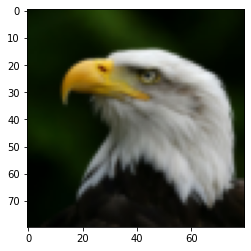

In [346]:
# image size is 80 x 80
img_resize = skimage.transform.resize(img_test,(80,80))
# rescale into 255
img_rescale = np.array(255*img_resize).astype(np.uint8)
plt.imshow(img_rescale)

In [352]:
# pass to pipeline model
img_reshape = img_rescale.reshape(-1,80,80,3)
print(img_reshape.shape)
result = model_pipeline.predict(img_reshape)
print(result)

(1, 80, 80, 3)
['eagle']


In [472]:
# Descision Function
distance = model_pipeline.decision_function(img_reshape)[0]
print(distance)

[ 5.75370712 12.24500513  5.76864729 12.20746737  2.7388824  19.30485679
  7.77682698  3.7492711   8.78288887 10.11721968 16.26141015 13.24395185
 17.28262812 -0.30971381  1.72096413  0.71980935 18.29393238 15.27077942
 13.23525647  5.75854397]


In [473]:
labels = list(data['labels'])
labels.sort()
print(labels)

['bear', 'cat', 'chicken', 'cow', 'deer', 'dog', 'duck', 'eagle', 'elephant', 'human', 'lion', 'monkey', 'mouse', 'natural', 'panda', 'pigeon', 'rabbit', 'sheep', 'tiger', 'wolf']


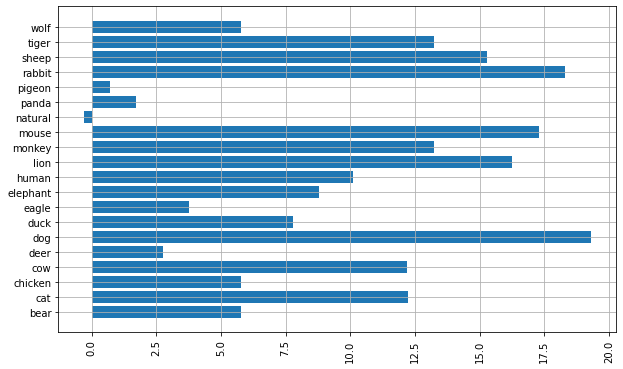

In [474]:
plt.figure(figsize=(10,6))
plt.barh(labels,distance)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [475]:
# confidence score
mean_distance = distance.mean()
std_distance = distance.std()
z = (distance - mean_distance)/std_distance
z

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])

In [476]:
mean_distance

9.496116738372246

In [477]:
std_distance

5.976331358171906

In [478]:
from scipy import stats

In [479]:
dist = stats.t

In [480]:
dist.cdf(2.21719813,19)

0.9804985267531022

In [481]:
dof = len(z) - 1
pvalues = [dist.cdf(zval,dof) for zval in z]
print(pvalues)

[0.2693157161111511, 0.6746184285442451, 0.2701187789365209, 0.6724013008095282, 0.13613339380733908, 0.94140393774905, 0.38835184849219784, 0.1741646039671521, 0.4531285822198086, 0.5408418151202851, 0.8641432492347143, 0.7309755940591313, 0.8959089406248415, 0.05864698735263532, 0.10440945435151623, 0.07916370072656952, 0.9213186651894776, 0.8269722933653654, 0.7305086321415764, 0.2695755643050099]


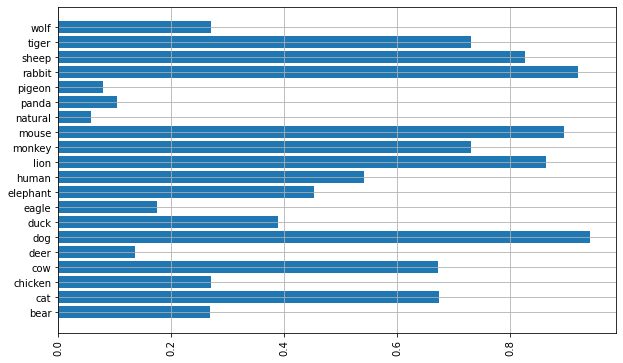

In [482]:
plt.figure(figsize=(10,6))
plt.barh(labels,pvalues)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [483]:
import scipy

In [484]:
aa = scipy.special.softmax(z)

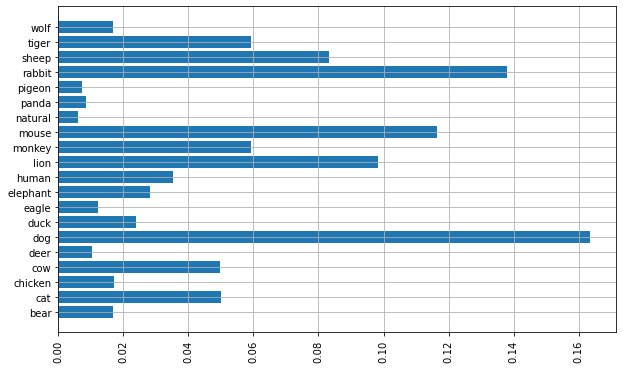

In [485]:
plt.figure(figsize=(10,6))
plt.barh(labels,aa)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [486]:
import scipy

In [487]:
scipy.stats.zscore(distance)

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])

In [488]:
z

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])